# Titanic Dataset: Exploratory Data Analysis (EDA)

## 📝 Introduction
This project analyzes the Titanic dataset to understand the factors that influenced passenger survival.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter
from pandas.plotting import scatter_matrix
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)
plt.rcParams['figure.figsize'] = (10,6)


In [2]:
import seaborn as sns
sns.__version__


'0.13.2'

In [5]:
df = pd.read_csv(r"C:\Users\SDC\Downloads\titanic.csv.xls")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 📑 Dataset Information (df.info)


In [18]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,29.525180,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.628258,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## ❗ Missing Values in the Dataset

In [7]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling Missing Values in the Dataset
In this step, missing values in the Titanic dataset were handled. 
Numerical features such as Age were filled using the median value, 
while categorical features like Embarked were filled using the mode. 
The Cabin column was removed due to a high percentage of missing values.


In [8]:
# -------- Missing Values Handling --------

# Age
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Embarked
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Cabin
if 'Cabin' in df.columns:
    missing_ratio = df['Cabin'].isna().sum() / len(df)
    if missing_ratio > 0.6:
        df.drop(columns=['Cabin'], inplace=True)
    else:
        df['HasCabin'] = df['Cabin'].notna().astype(int)

# Fare
if 'Fare' in df.columns:
    df.dropna(subset=['Fare'], inplace=True)

# -------- Check Missing Values --------
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 📋 Preview of Selected Passenger Details (Head, Name, Fare)


In [17]:
df[['Name', 'Age', 'Fare']].head()


,Name,Age,Fare
0,"Kelly, Mr. James",34.5,7.8292
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,7.0000
2,"Myles, Mr. Thomas Francis",62.0,9.6875
3,"Wirz, Mr. Albert",27.0,8.6625
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,12.2875


## 👶 Overview of Age Feature


In [18]:
df[df['Age'] > 50]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
13,905,0,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S
20,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
77,969,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
131,1023,0,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C


## 👥 Average Age Grouped by Gender


In [19]:
df.groupby('Sex')['Age'].mean()


Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

### Preview of Age Column (First 10 Entries)


In [20]:
ages = df['Age'].values
ages[:10]


array([34.5, 47. , 62. , 27. , 22. , 14. , 30. , 26. , 18. , 21. ])

### Age Summary Statistics (Mean, Median, Std)


In [21]:
np.mean(ages)
np.median(ages)
np.std(ages)


np.float64(nan)

### Generating Random Values Using NumPy


In [22]:
rand_arr = np.random.rand(5)
rand_arr


array([0.97825329, 0.12297204, 0.15361381, 0.3654958 , 0.53860814])

# 📊 Descriptive Statistics of Numerical Features



## 📊 Age Distribution of Passengers


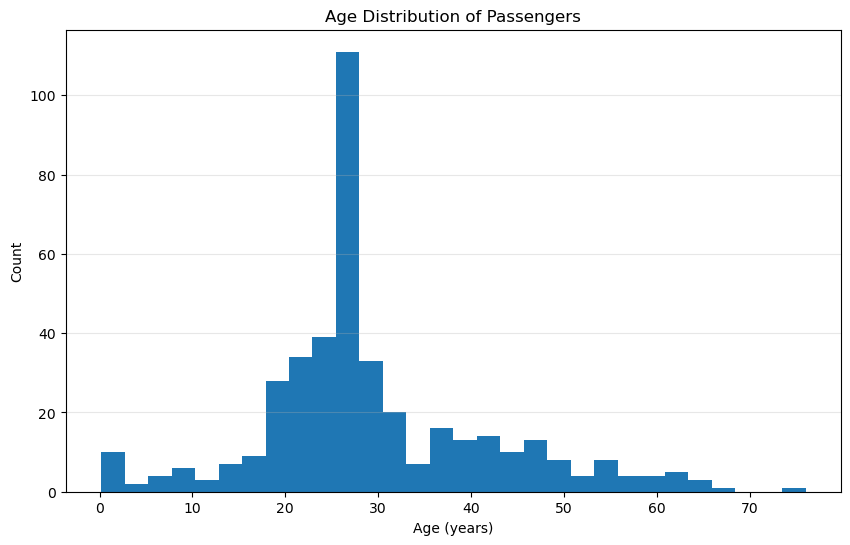

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'].dropna(), bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()



## 🚢 Survival Count (Survived vs Not Survived)


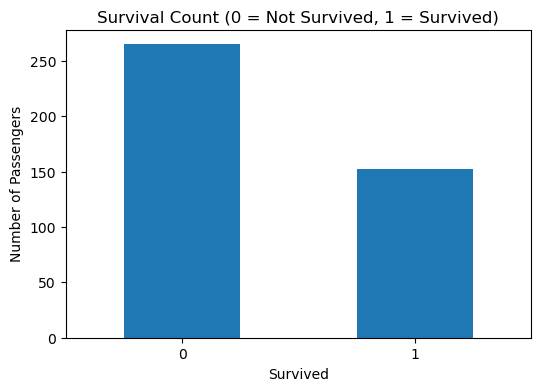

In [11]:
plt.figure(figsize=(6,4))
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.show()


## 👥 Gender Distribution


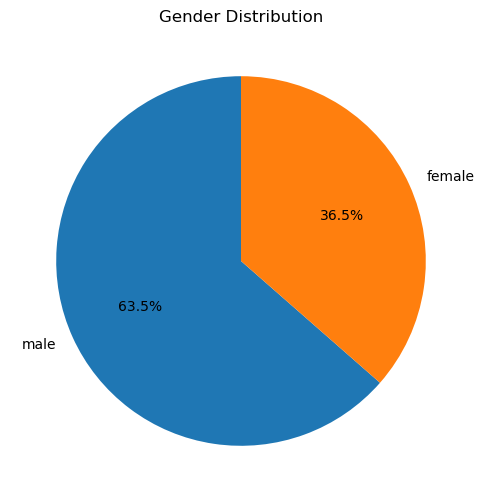

In [12]:
plt.figure(figsize=(6,6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")  # hide default y-label for pie
plt.show()


## 💰 Relationship Between Age and Fare


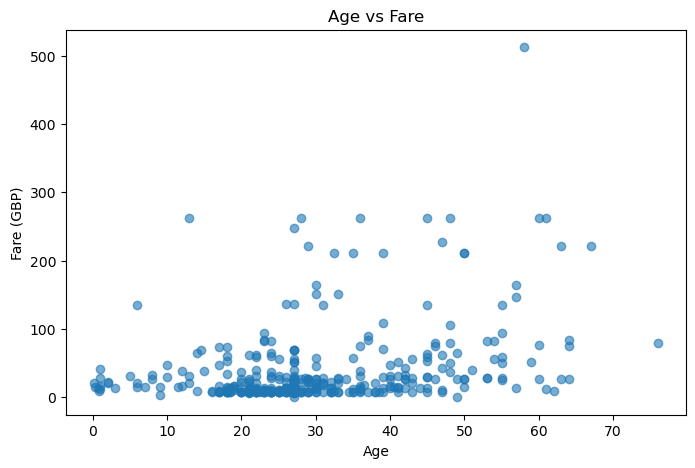

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Fare'], alpha=0.6)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare (GBP)")
plt.show()


## 📦 Age Distribution by Gender (Boxplot)


<Figure size 700x500 with 0 Axes>

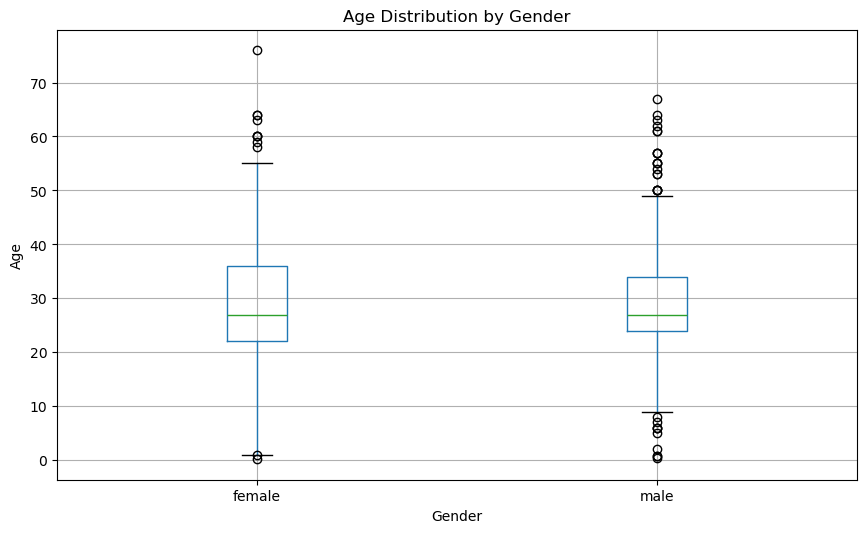

In [15]:
plt.figure(figsize=(7,5))
df.boxplot(column='Age', by='Sex')
plt.title("Age Distribution by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


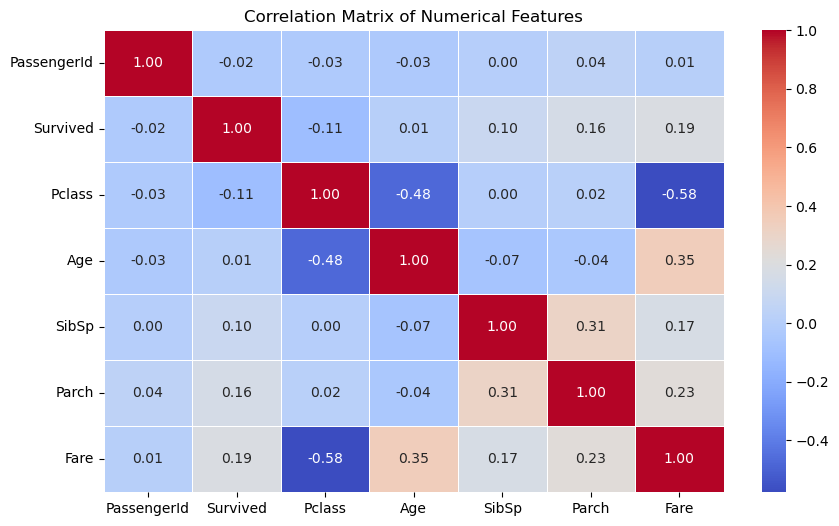

In [9]:
import seaborn as sns
plt.figure(figsize=(10,6))
num_cols = df.select_dtypes(include=['int64','float64']).columns
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()



# 🔍 Survival Rate Analysis


In [16]:
# Survival Rate Analysis

# Total survival rate
total_survival_rate = df['Survived'].mean() * 100
print(f"Total Survival Rate: {total_survival_rate:.2f}%")

# Survival rate by Gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival Rate by Gender:")
print(gender_survival)

# Survival rate by Passenger Class
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival Rate by Passenger Class:")
print(class_survival)

# Survival rate by Embarked port
embarked_survival = df.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival Rate by Embarked:")
print(embarked_survival)


Total Survival Rate: 36.45%

Survival Rate by Gender:
Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
Pclass
1    46.728972
2    32.258065
3    33.179724
Name: Survived, dtype: float64

Survival Rate by Embarked:
Embarked
C    39.215686
Q    52.173913
S    32.713755
Name: Survived, dtype: float64


## Project Summary

The Titanic dataset contains passenger information like Age, Gender, Class, Fare, and Survival.  
This project explored factors affecting survival using data cleaning, visualization, and basic statistics.

**Key Insights:**
- **Gender:** Females survived more than males.  
- **Class:** 1st Class passengers survived more than 3rd Class.  
- **Age:** Children had higher survival chances; elderly survived less.  
- **Fare & Family:** Wealthier passengers and small families survived more.

---

## ✅ Conclusion

Survival on the Titanic was influenced by social and demographic factors:  
**Women, children, and wealthy passengers survived more, while men and lower-class passengers were more vulnerable.**